In [39]:
import os 
import pandas as pd

#Análisis de partida entre dos IAs
#Cargamos el dataset
df = pd.read_csv('data.csv')
df.head()

,command
0,black JJJJ
1,white JKKJ
2,black ILIK
3,white KIII
4,black JIKL


In [41]:
# Eliminar todos los comandos que no empiezan por black o white
df = df[df['command'].str.contains("black") | df['command'].str.contains("white")]
# df.player.map({'black': 0, 'white': 1})
df.head()

,command
0,black JJJJ
1,white JKKJ
2,black ILIK
3,white KIII
4,black JIKL


In [42]:
# Resetear el índice
df = df.reset_index(drop=True)
df.head()

,command
0,black JJJJ
1,white JKKJ
2,black ILIK
3,white KIII
4,black JIKL


In [43]:
def get_player(command):
    if command.startswith('black'):
        return 0
    elif command.startswith('white'):
        return 1


def get_move1(command):
    # Obtener dos ultimas letras del comando
    move = command.split(' ')[-1]
    # Obtener las dos primeras letras del comando
    move = move[:2]
    return move


def get_move2(command):
    # Obtener dos ultimas letras del comando
    move = command.split(' ')[-1]
    # Obtener las dos primeras letras del comando
    move = move[2:]
    return move

# Crear columnas con el jugador y el movimiento
df['player'] = df['command'].apply(get_player)
df['move_1'] = df['command'].apply(get_move1)
df['move_2'] = df['command'].apply(get_move2)

df.head()

,command,player,move_1,move_2
0,black JJJJ,0,JJ,JJ
1,white JKKJ,1,JK,KJ
2,black ILIK,0,IL,IK
3,white KIII,1,KI,II
4,black JIKL,0,JI,KL


In [44]:
def get_move_x(move):
    return move[0]

def get_move_y(move):
    return move[1]

# Crear columnas con el movimiento en x e y
df['move_1_x'] = df['move_1'].apply(get_move_x)
df['move_1_y'] = df['move_1'].apply(get_move_y)
df['move_2_x'] = df['move_2'].apply(get_move_x)
df['move_2_y'] = df['move_2'].apply(get_move_y)

df.head()

,command,player,move_1,move_2,move_1_x,move_1_y,move_2_x,move_2_y
0,black JJJJ,0,JJ,JJ,J,J,J,J
1,white JKKJ,1,JK,KJ,J,K,K,J
2,black ILIK,0,IL,IK,I,L,I,K
3,white KIII,1,KI,II,K,I,I,I
4,black JIKL,0,JI,KL,J,I,K,L


In [45]:
# Crear un diccionario con claves de las letras y valores de los números de la A a la S
letters = 'ABCDEFGHIJKLMNOPQRS'
letters_dict = {}
for i, letter in enumerate(letters):
    letters_dict[letter] = i

# Crear columnas con el movimiento en x e y en números
df['move_1_x'] = df['move_1_x'].apply(lambda x: letters_dict[x])
df['move_1_y'] = df['move_1_y'].apply(lambda x: letters_dict[x])
df['move_2_x'] = df['move_2_x'].apply(lambda x: letters_dict[x])
df['move_2_y'] = df['move_2_y'].apply(lambda x: letters_dict[x])

df.head()

,command,player,move_1,move_2,move_1_x,move_1_y,move_2_x,move_2_y
0,black JJJJ,0,JJ,JJ,9,9,9,9
1,white JKKJ,1,JK,KJ,9,10,10,9
2,black ILIK,0,IL,IK,8,11,8,10
3,white KIII,1,KI,II,10,8,8,8
4,black JIKL,0,JI,KL,9,8,10,11


In [47]:
# Crear columna con el orden de la jugada
df['move_number'] = df.index + 1

# modulo del movimiento en x e y
df['mod_move_1'] = (df['move_1_x']**2 + df['move_1_y']**2 )**(1/2)
df['mod_move_2'] = (df['move_2_x']**2 + df['move_2_y']**2 )**(1/2)



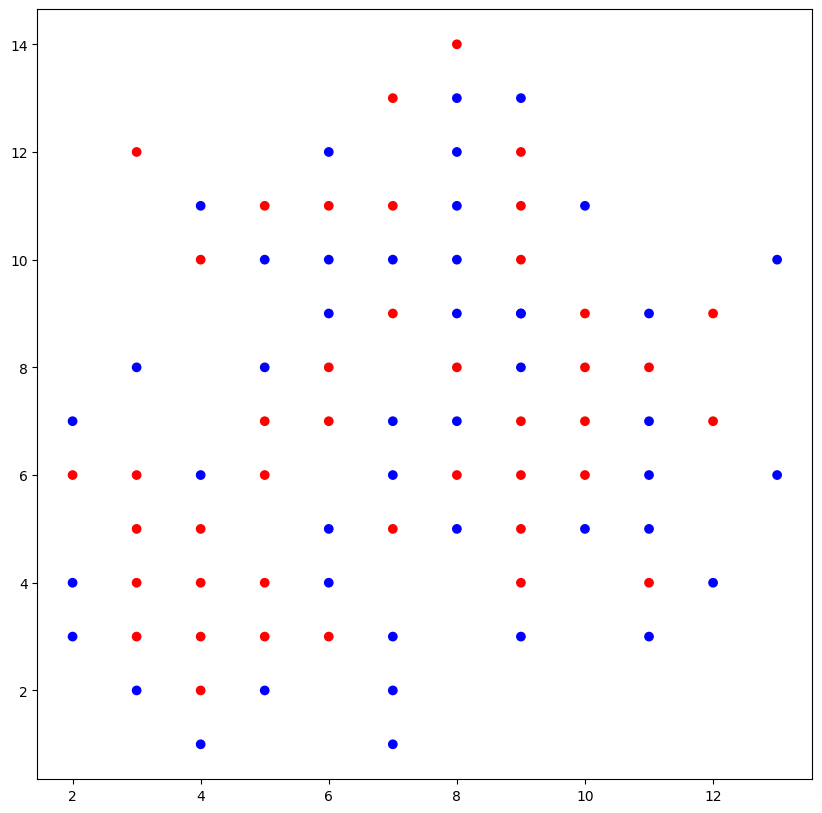

In [49]:
plt.figure(figsize=(10, 10))
plt.scatter(df['move_1_x'], df['move_1_y'], c=df['player'], cmap='bwr')
plt.scatter(df['move_2_x'], df['move_2_y'], c=df['player'], cmap='bwr')
plt.show()


In [52]:
# Extraer informacion de los datos de la partida

df_black = df[df['player'] == 0]
df_white = df[df['player'] == 1]

df_black['move_1_x_number_diff'] = df_black['move_1_x'].diff()
df_black['move_1_y_number_diff'] = df_black['move_1_y'].diff()
df_black['move_2_x_number_diff'] = df_black['move_2_x'].diff()
df_black['move_2_y_number_diff'] = df_black['move_2_y'].diff()

df_white['move_1_x_number_diff'] = df_white['move_1_x'].diff()
df_white['move_1_y_number_diff'] = df_white['move_1_y'].diff()
df_white['move_2_x_number_diff'] = df_white['move_2_x'].diff()
df_white['move_2_y_number_diff'] = df_white['move_2_y'].diff()

# df['move_1_x_number_diff'] = df['move_1_x_number'].diff()
# df['move_1_y_number_diff'] = df['move_1_y_number'].diff()
# df['move_2_x_number_diff'] = df['move_2_x_number'].diff()
# df['move_2_y_number_diff'] = df['move_2_y_number'].diff()

df.head()

C:\Users\pablo\AppData\Local\Temp\ipykernel_20476\3851324071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_black['move_1_x_number_diff'] = df_black['move_1_x'].diff()
C:\Users\pablo\AppData\Local\Temp\ipykernel_20476\3851324071.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_black['move_1_y_number_diff'] = df_black['move_1_y'].diff()
C:\Users\pablo\AppData\Local\Temp\ipykernel_20476\3851324071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,command,player,move_1,move_2,move_1_x,move_1_y,move_2_x,move_2_y,move_number,mod_move_1,mod_move_2
0,black JJJJ,0,JJ,JJ,9,9,9,9,1,12.727922,12.727922
1,white JKKJ,1,JK,KJ,9,10,10,9,2,13.453624,13.453624
2,black ILIK,0,IL,IK,8,11,8,10,3,13.601471,12.806248
3,white KIII,1,KI,II,10,8,8,8,4,12.806248,11.313708
4,black JIKL,0,JI,KL,9,8,10,11,5,12.041595,14.866069


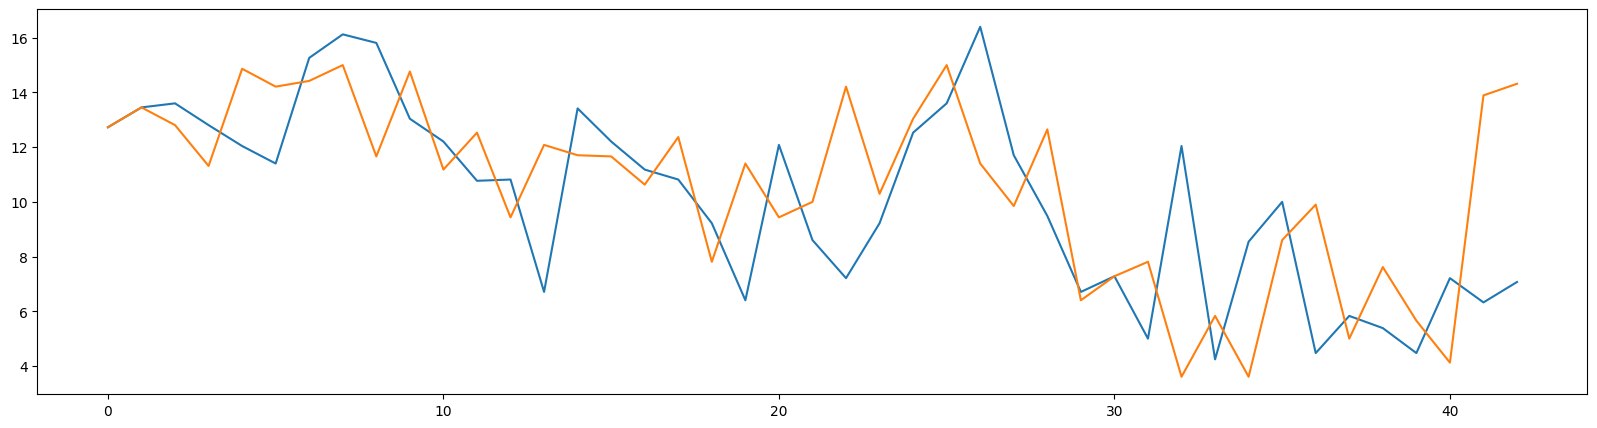

: 

In [58]:
# Grafico de modulo en funcion del turno

import matplotlib.pyplot as plt


plt.figure(figsize=(20, 5))
plt.plot(df['mod_move_1'])
plt.plot(df['mod_move_2'])
# plt.scatter(df['move_number'], df['mod_move_2'], c=df['player'], cmap='bwr')
plt.show()

<Axes: >

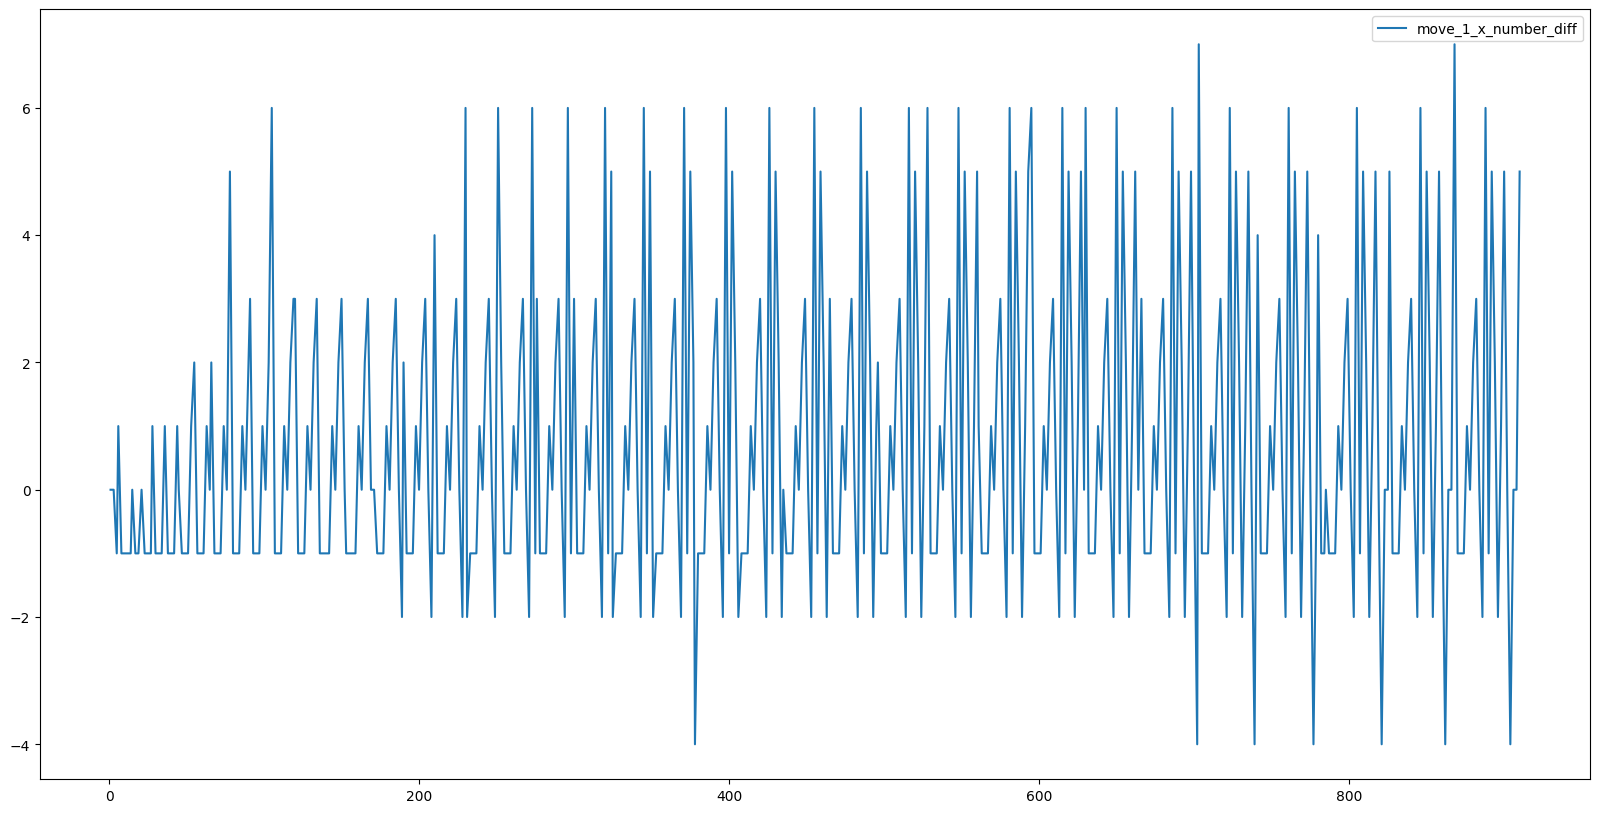

In [26]:
# Lineplot eje x el df index y eje vertical el valor de la 
# columna move_1_x_number_diff
def get_modulo_desplazamiento(x):
    if x > 8:
        return 16 - x
    else:
        return x
df['modulo_diff'] = 

df[df.player == 'black'].plot(figsize=(20, 10), y='move_1_x_number_diff')


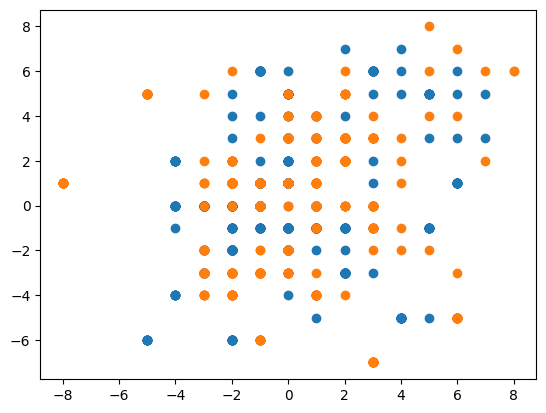

In [20]:
# hacer un scatter plot 
import matplotlib.pyplot as plt
plt.scatter(df['move_1_x_number_diff'], df['move_1_y_number_diff'])
plt.scatter(df['move_2_x_number_diff'], df['move_2_y_number_diff'])
plt.show()

In [ ]:
# scatter plot con datos de partida

In [18]:
df.shape

(911, 16)

<Axes: >

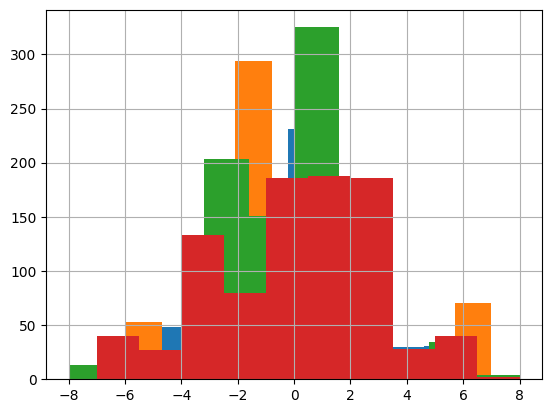

In [17]:
# Visualizar histogramas de los movimientos
df['move_1_x_number_diff'].hist()
df['move_1_y_number_diff'].hist()
df['move_2_x_number_diff'].hist()
df['move_2_y_number_diff'].hist()

